# **Restaurant deliveries & take out Predictions**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import json
import ast

In [ ]:
do = pd.read_excel("/content/Orders3.xlsx")

# **Visualize Time series**

**Prepare data**

In [ ]:
Time= list(do['date'])
Deliveries = list(do['delivery'])
Take = list(do['emporter'])
len(Time)

1681

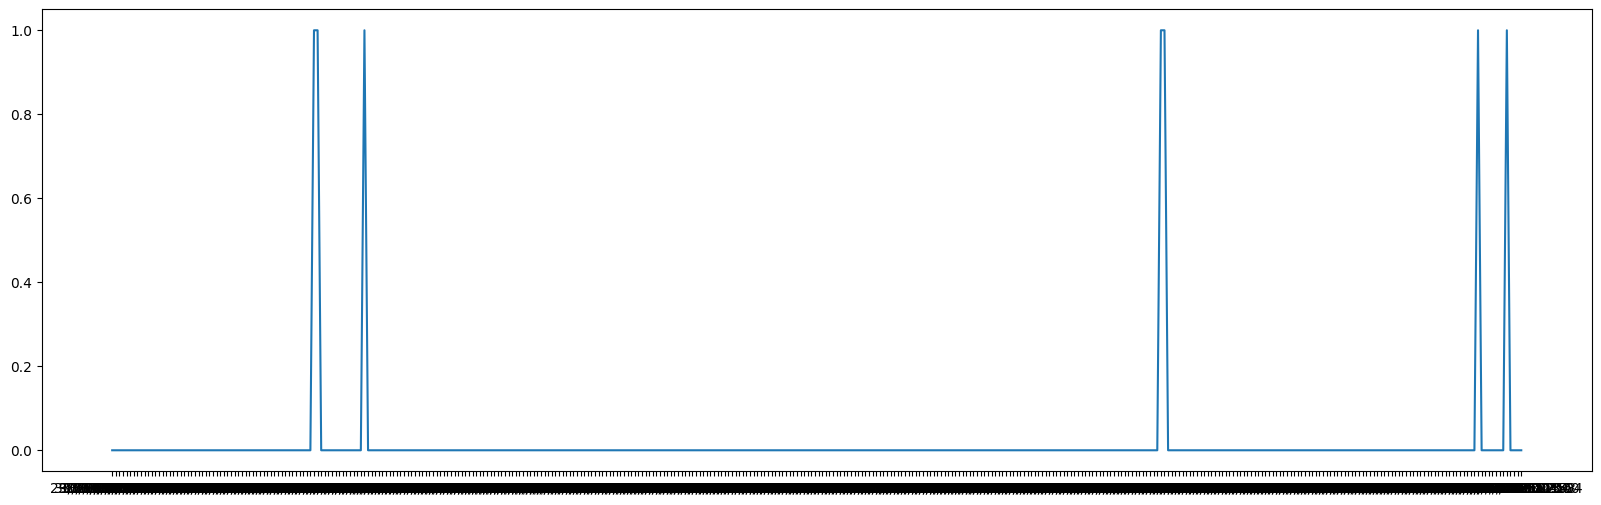

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(Time,Deliveries)

In [ ]:
#Deliveries
Time_Drinks=[]
Time_Food=[]
Deliveries_Drinks=[]
Deliveries_Food=[]
for i in range(len(Time)):
    if (do['article.category_name'][i]=='Drinks') :
      Time_Drinks.append(Time[i])
      Deliveries_Drinks.append(Deliveries[i])
    else :
      Time_Food.append(Time[i])
      Deliveries_Food.append(Deliveries[i])

#TakeAway
Time_Drinks=[]
Time_Food=[]
Take_Drinks=[]
Take_Food=[]
for i in range(len(Time)):
    if (do['article.category_name'][i]=='Drinks') :
      Time_Drinks.append(Time[i])
      Take_Drinks.append(Take[i])
    else :
      Time_Food.append(Time[i])
      Take_Food.append(Take[i])

# **Deliveries**

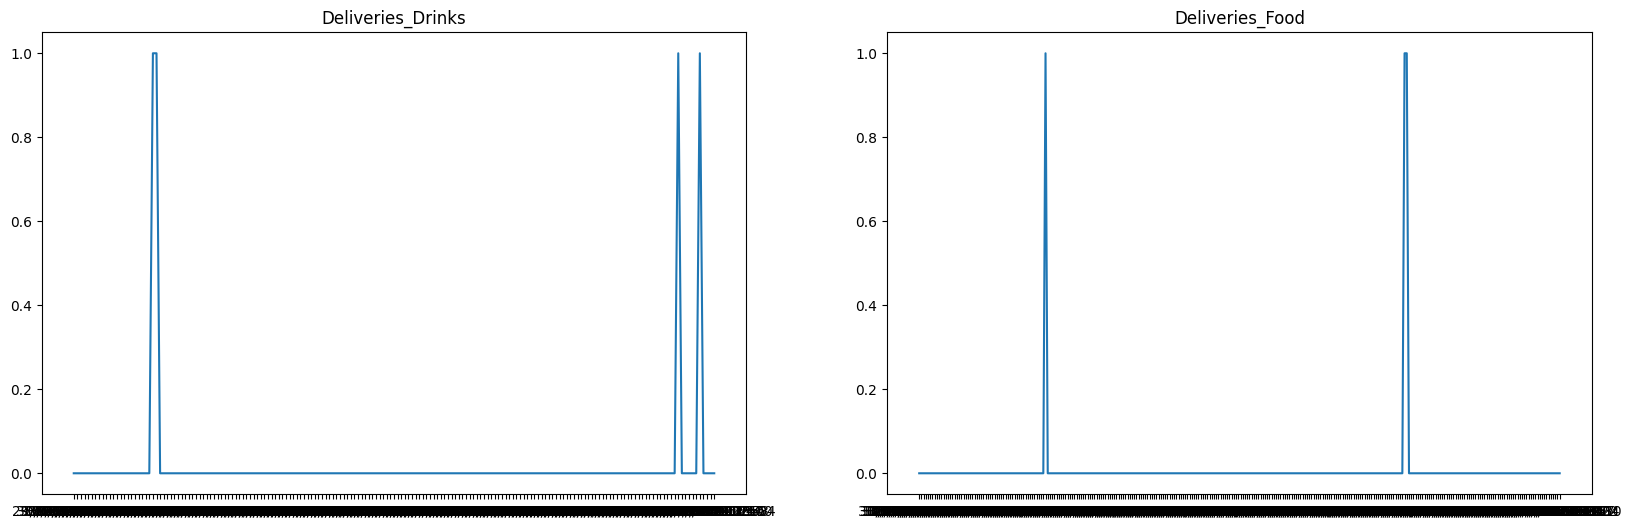

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(Time_Drinks,Deliveries_Drinks)
axes[0].set_title('Deliveries_Drinks')
axes[1].plot(Time_Food,Deliveries_Food)
axes[1].set_title('Deliveries_Food')
plt.show()

# **Take away**

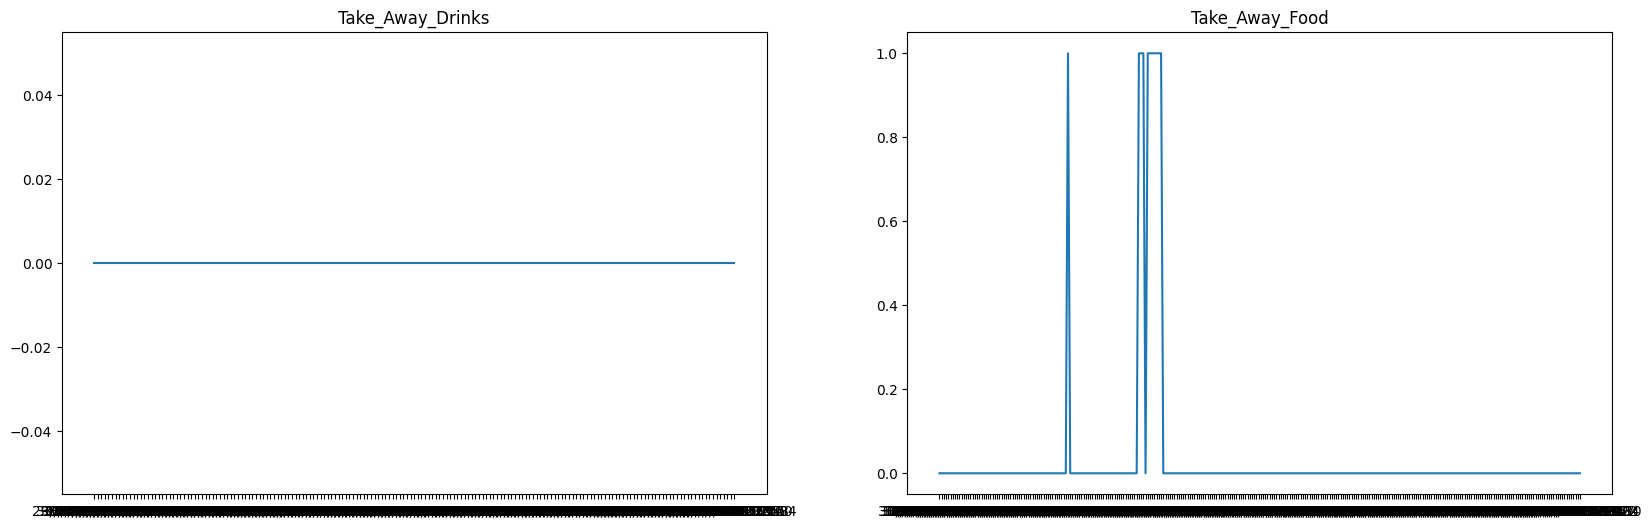

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(Time_Drinks,Take_Drinks)
axes[0].set_title('Take_Away_Drinks')
axes[1].plot(Time_Food,Take_Food)
axes[1].set_title('Take_Away_Food')

plt.show()

# Split the data

In [ ]:
# Define the split time
split_time = 1178 #70% training ; 30% validation

# Get the train set
time_train = Time[:split_time]
x_train = Deliveries[:split_time]

# Get the validation set
time_valid = Time[split_time:]
x_valid = Deliveries[split_time:]

# Evaluating the data : ACF AC

**Full Data**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# Select relevant data, index by Date
data = do[['date', 'delivery']].set_index(['date'])

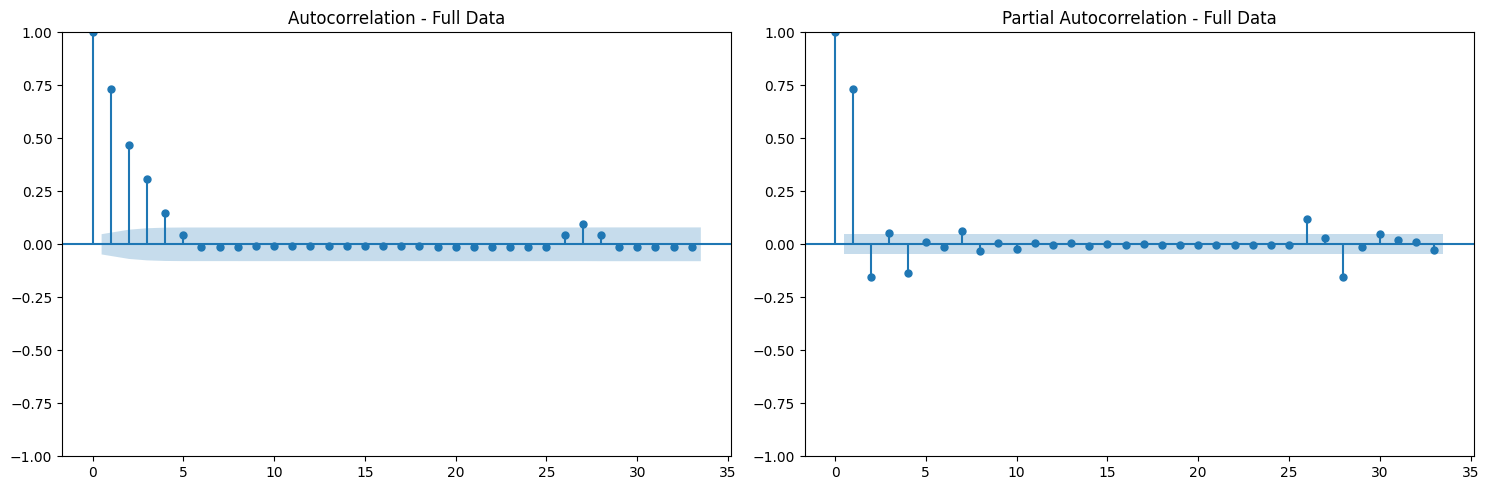

In [ ]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot autocorrelation in the top-left subplot
plot_acf(data, ax=axes[0])
axes[0].set_title('Autocorrelation - Full Data')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - Full Data')


plt.tight_layout()
plt.show()

**Drinks**

In [ ]:
data_Drinks_Delivery = pd.DataFrame(Deliveries_Drinks)

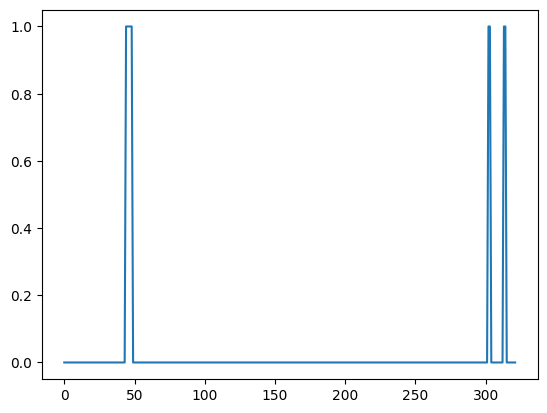

In [ ]:
plt.plot(data_Drinks_Delivery)
plt.show()

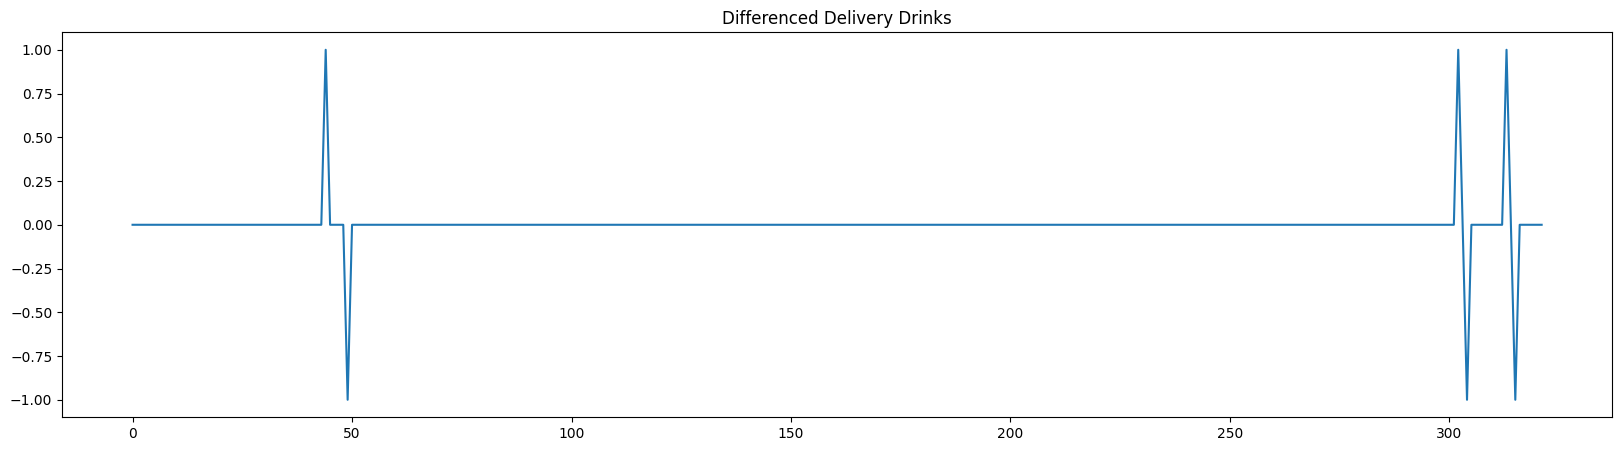

In [ ]:
plt.figure(figsize=(20,5))
data_Drinks1=data_Drinks_Delivery.diff().fillna(data_Drinks_Delivery)
plt.plot(data_Drinks1)
plt.title('Differenced Delivery Drinks')
plt.show()

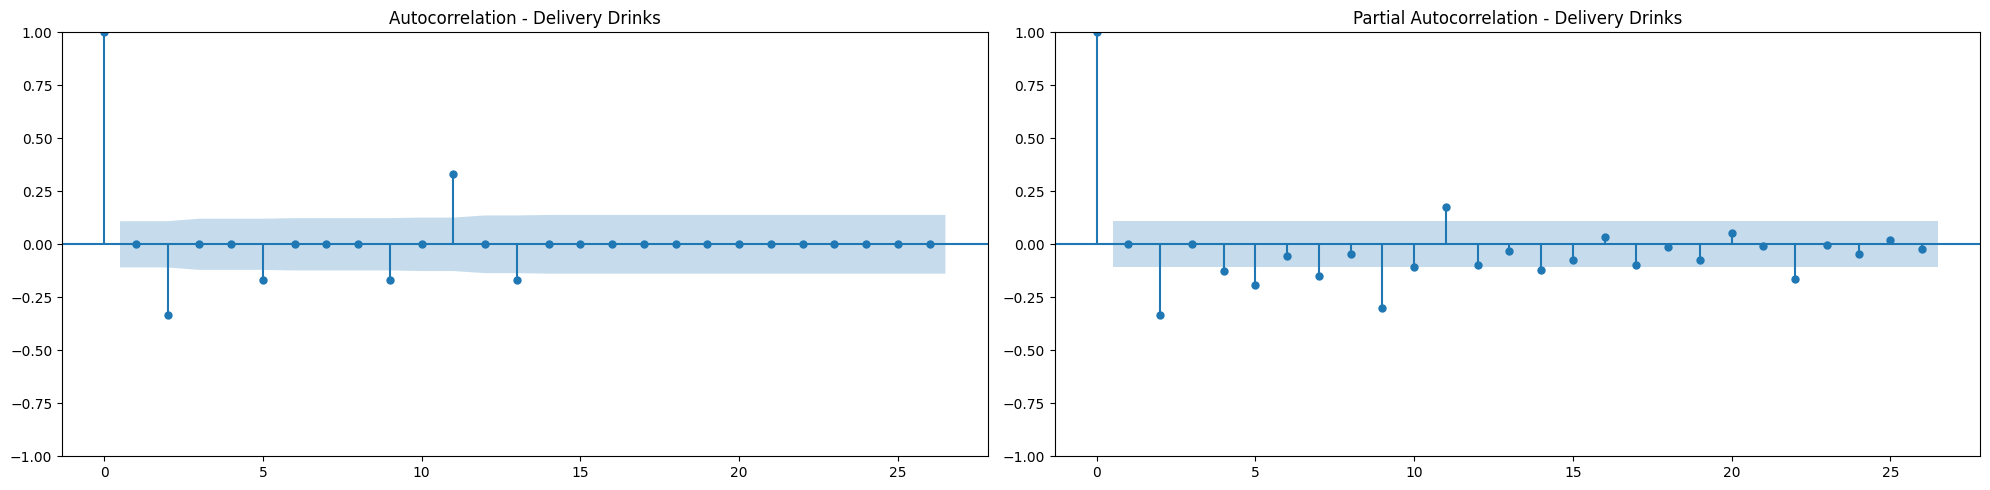

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot autocorrelation in the top-left subplot
plot_acf(data_Drinks1, ax=axes[0])
axes[0].set_title('Autocorrelation - Delivery Drinks')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_Drinks1, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - Delivery Drinks')


plt.tight_layout()
plt.show()

<Figure size 3600x2400 with 0 Axes>

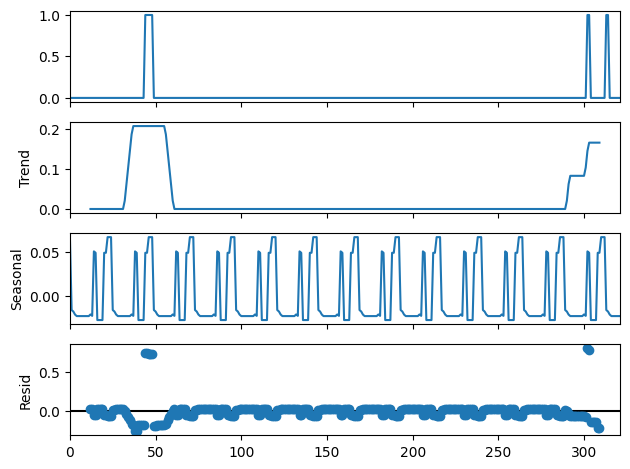

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_Drinks_Delivery, model='additive', period=24) #24hours
plt.figure(figsize=(36, 24))
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_Food, model='additive', period=24) #24hours
plt.figure(figsize=(36, 24))
result.plot()
plt.show()

NameError: ignored

**Food**

In [ ]:
data_Food = pd.DataFrame(Deliveries_Food)

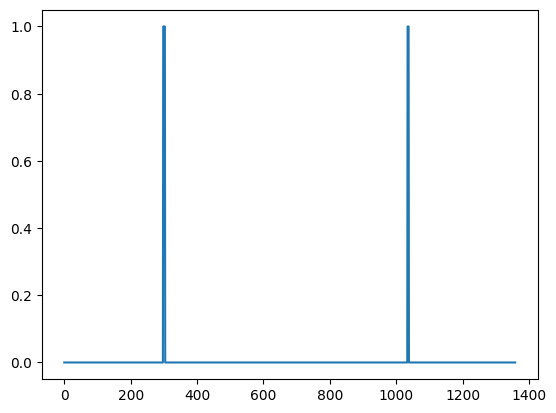

In [ ]:
plt.plot(data_Food)
plt.show()

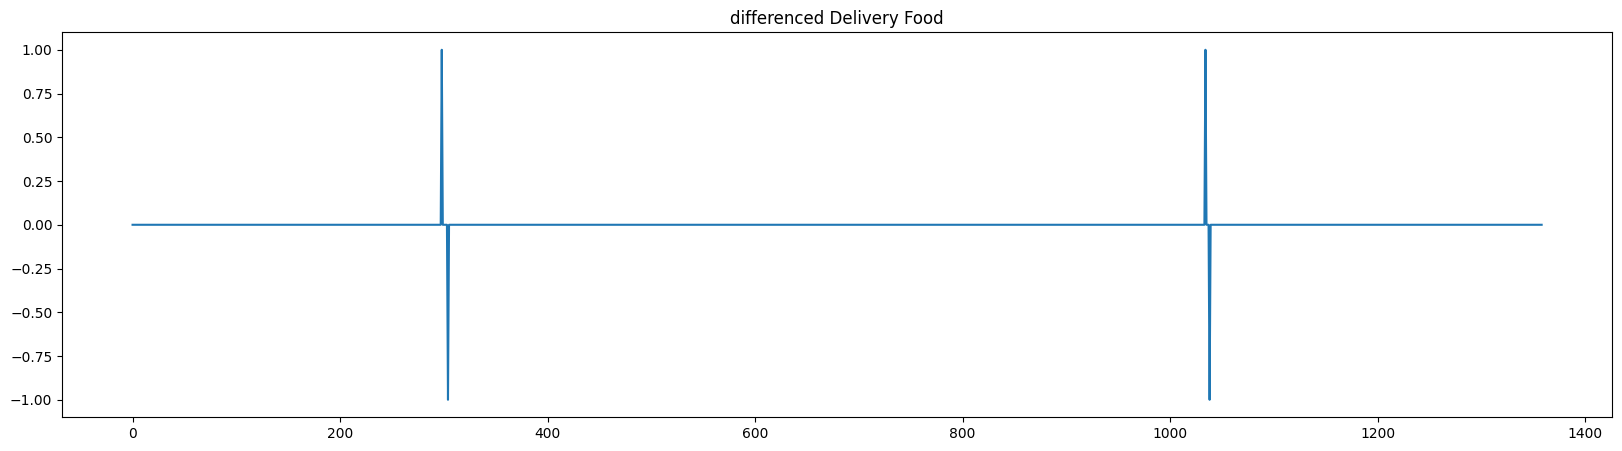

In [ ]:
plt.figure(figsize=(20,5))
data_Food1=data_Food.diff().fillna(data_Food)
plt.plot(data_Food1)
plt.title('differenced Delivery Food')
plt.show()

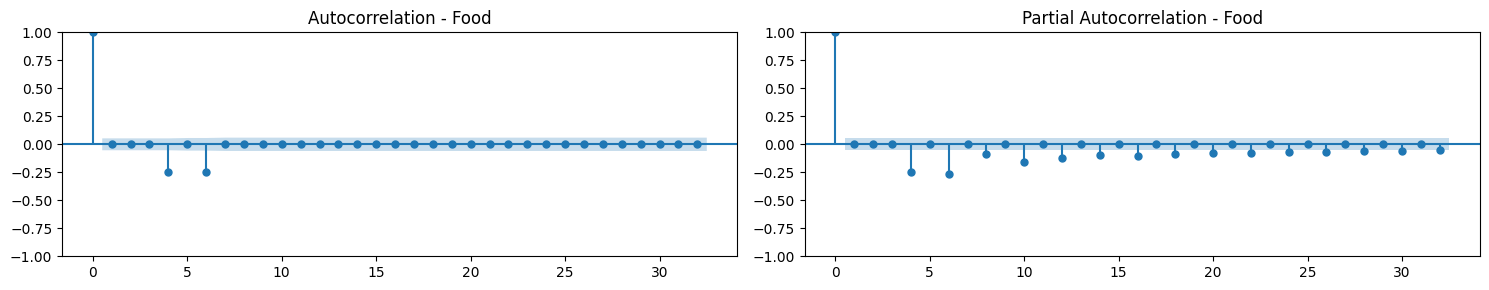

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

# Plot autocorrelation in the top-left subplot
plot_acf(data_Food1, ax=axes[0])
axes[0].set_title('Autocorrelation - Delivery Food')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_Food1, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - Delivery Food')


plt.tight_layout()
plt.show()

In [ ]:
'''
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_Food, model='additive', period=24) #24hours
plt.figure(figsize=(36, 24))
result.plot()
plt.show()
'''

"\nfrom statsmodels.tsa.seasonal import seasonal_decompose\nresult = seasonal_decompose(data_Food, model='additive', period=24) #24hours\nplt.figure(figsize=(36, 24))\nresult.plot()\nplt.show()\n"

# Train the model using ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

**Drinks**

In [ ]:
model = ARIMA(data_Drinks1, order=(1,0,0))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  322
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 184.331
Date:                Thu, 28 Sep 2023   AIC                           -362.663
Time:                        14:37:43   BIC                           -351.339
Sample:                             0   HQIC                          -358.142
                                - 322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.577e-06      0.011     -0.000      1.000      -0.021       0.021
ar.L1       5.062e-08   2951.027   1.72e-11      1.000   -5783.908    5783.908
sigma2         0.0186      0.000     65.113      0.0

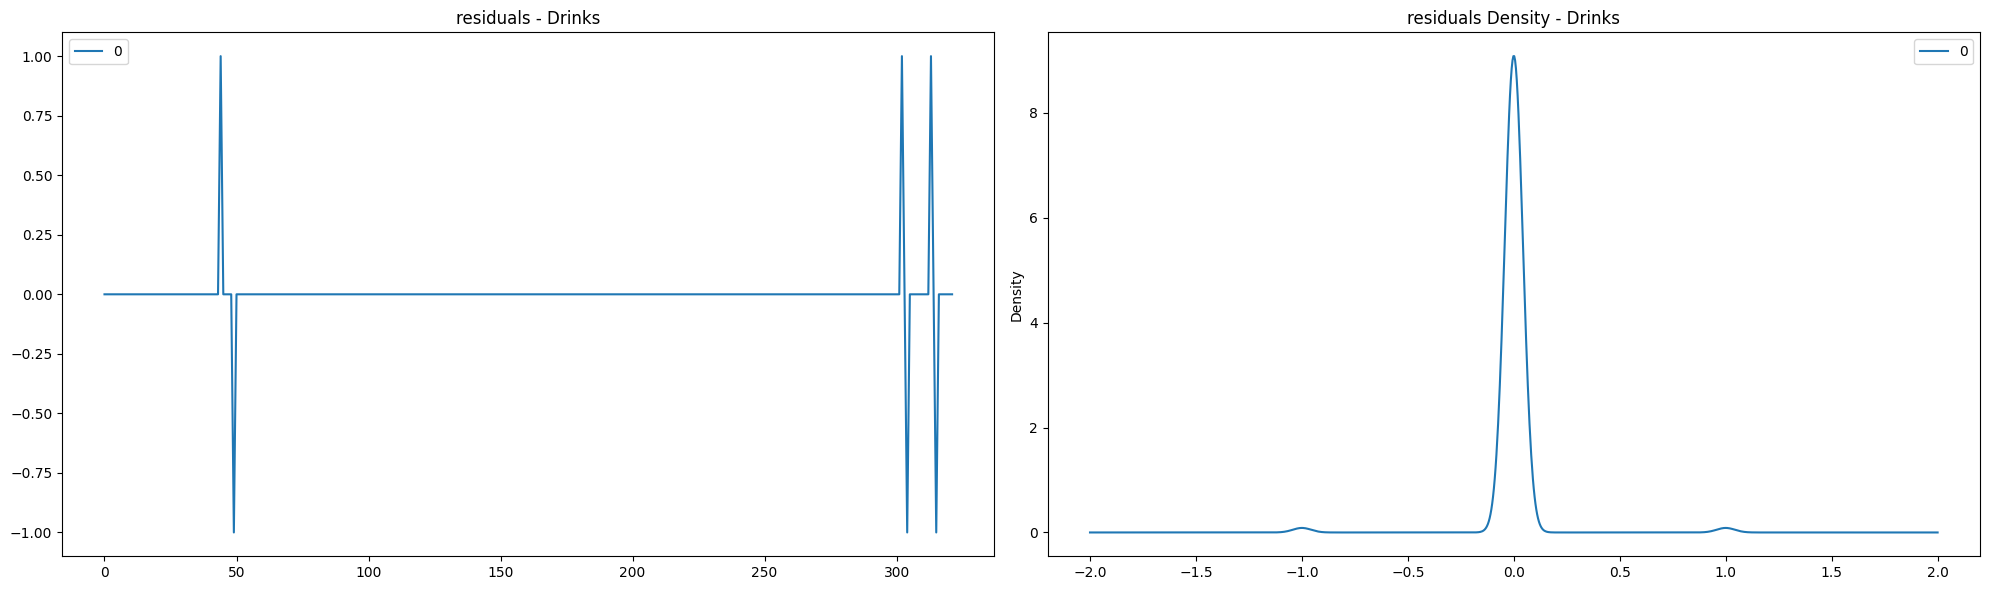

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes[0])
axes[0].set_title('residuals - Drinks')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1])
axes[1].set_title('residuals Density - Drinks')

plt.tight_layout()
plt.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  322.000000
mean     0.000003
std      0.136717
min     -0.999997
25%      0.000003
50%      0.000003
75%      0.000003
max      1.000003


**Food**

In [ ]:
model = ARIMA(data_Food1, order=(1,0,0))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 1359
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2031.931
Date:                Thu, 28 Sep 2023   AIC                          -4057.863
Time:                        14:37:44   BIC                          -4042.219
Sample:                             0   HQIC                         -4052.006
                               - 1359                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.425e-06      0.001     -0.002      0.999      -0.003       0.003
ar.L1       7.144e-09   3.57e-09      2.002      0.045    1.49e-10    1.41e-08
sigma2         0.0029   8.67e-06    339.303      0.0

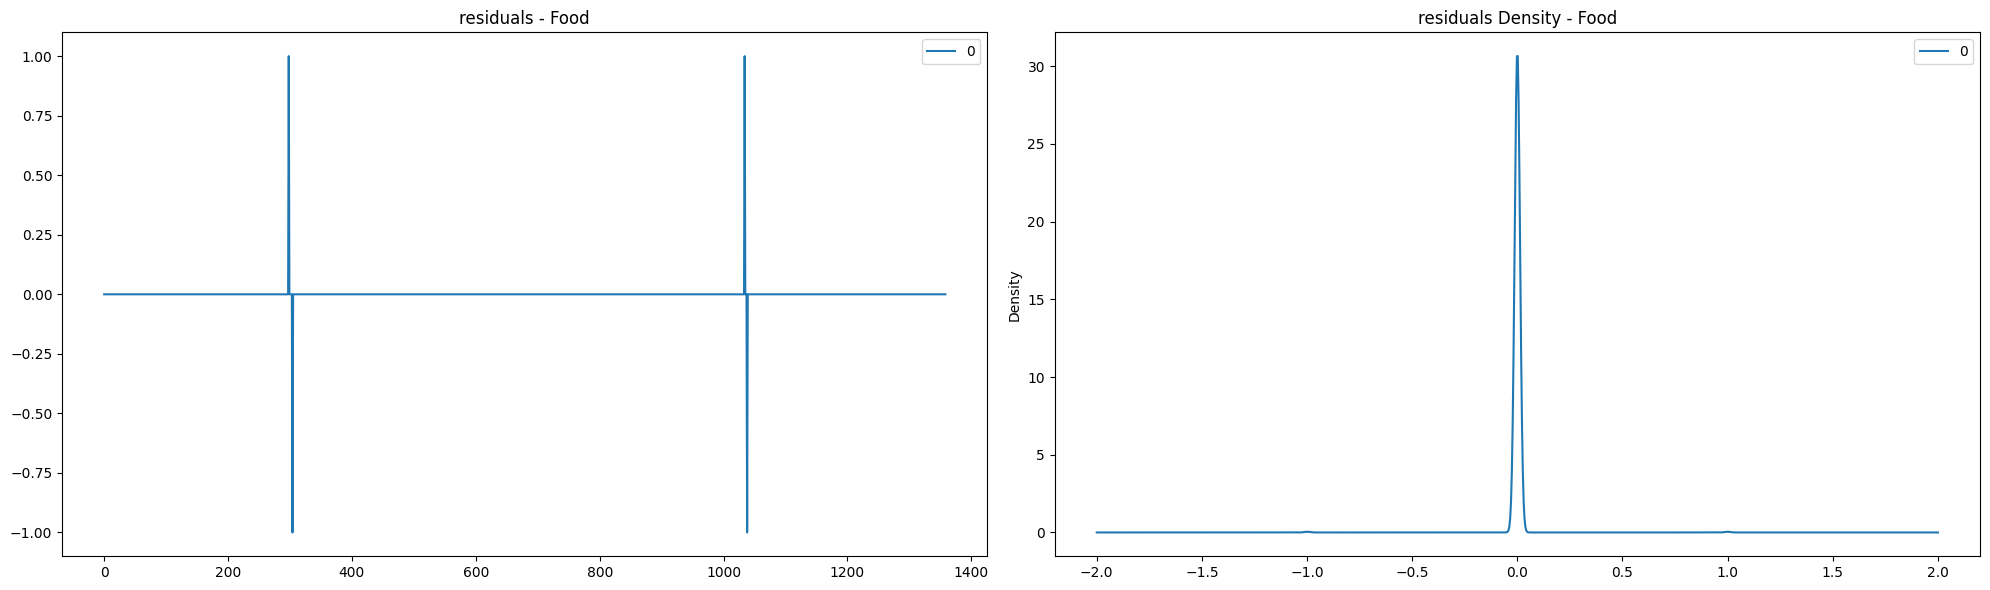

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(ax=axes[0])
axes[0].set_title('residuals - Food')

# density plot of residuals
residuals.plot(kind='kde',ax=axes[1])
axes[1].set_title('residuals Density - Food')

plt.tight_layout()
plt.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                 0
count  1359.000000
mean      0.000002
std       0.054273
min      -0.999998
25%       0.000002
50%       0.000002
75%       0.000002
max       1.000002


# **==> La valeur du résidus est pratiquement nulle, Le modèle traduit bien les données**

# Forecast & Evaluate

In [ ]:
#pd.DataFrame(time_valid,x_valid).set_axis([ 'B', 'C'], axis='columns', inplace=True)

In [ ]:
#predictions = model_fit.predict(data)